<a href="https://colab.research.google.com/github/rajanm/END2_0_Session_5/blob/main/Stanford_Sentiment_Analysis_using_LSTM_RNN_Multiple_Augmentation_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup ###

Your first step to deep learning in NLP. We will be mostly using PyTorch. Just like torchvision, PyTorch provides an official library, torchtext, for handling text-processing pipelines. 

We will be using previous session tweet dataset. Let's just preview the dataset.

In [ ]:
!nvidia-smi

Tue Jun  8 16:25:20 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import pandas as pd

In [ ]:
!ls -alh

total 16K
drwxr-xr-x 1 root root 4.0K Jun  1 13:40 .
drwxr-xr-x 1 root root 4.0K Jun  8 16:24 ..
drwxr-xr-x 4 root root 4.0K Jun  1 13:40 .config
drwxr-xr-x 1 root root 4.0K Jun  1 13:40 sample_data


In [ ]:
TEXT_COL, LABEL_COL = 'text', 'label'
DATASET_DIR = "/content/"

In [ ]:
!pip install nlpaug
!pip install swifter
!pip install gdown

     |████████████████████████████████| 399kB 7.2MB/s 
     |████████████████████████████████| 634kB 9.5MB/s 
     |████████████████████████████████| 296kB 20.1MB/s 
     |████████████████████████████████| 583kB 33.8MB/s 
     |████████████████████████████████| 122kB 51.8MB/s 
     |████████████████████████████████| 17.2MB 180kB/s 
     |████████████████████████████████| 48.5MB 59kB/s 
     |████████████████████████████████| 204kB 44.0MB/s 
     |████████████████████████████████| 81kB 13.3MB/s 
     |████████████████████████████████| 1.3MB 41.5MB/s 
     |████████████████████████████████| 133kB 56.9MB/s 
     |████████████████████████████████| 3.1MB 40.6MB/s 
     |████████████████████████████████| 71kB 11.9MB/s 
     |████████████████████████████████| 81kB 11.7MB/s 
     |████████████████████████████████| 143kB 57.3MB/s 
     |████████████████████████████████| 296kB 56.6MB/s 
     |████████████████████████████████| 92kB 13.9MB/s 
  Created wheel for swifter: filename=swifter-1.0.7-cp3

In [ ]:
!pip install hydra-core omegaconf

     |████████████████████████████████| 133kB 8.2MB/s 
     |████████████████████████████████| 81kB 11.3MB/s 
     |████████████████████████████████| 112kB 25.7MB/s 
     |████████████████████████████████| 645kB 21.6MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-cp37-none-any.whl size=141231 sha256=01782611119eb0202e1ec4019557db99a0bbbb0d0ae8ccc0f3bf8f6be0adf197
  Stored in directory: /root/.cache/pip/wheels/e3/e2/fa/b78480b448b8579ddf393bebd3f47ee23aa84c89b6a78285c8
Successfully built antlr4-python3-runtime
ERROR: hydra-core 1.0.6 has requirement omegaconf<2.1,>=2.0.5, but you'll have omegaconf 2.1.0 which is incompatible.
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


### Data Downloads ###

Download and extract the Stanford reviews data.

In [ ]:
#download the stanford dataset to local storage for processing
!wget http://nlp.stanford.edu/~socherr/stanfordSentimentTreebank.zip

--2021-06-08 16:25:53--  http://nlp.stanford.edu/~socherr/stanfordSentimentTreebank.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/~socherr/stanfordSentimentTreebank.zip [following]
--2021-06-08 16:25:53--  https://nlp.stanford.edu/~socherr/stanfordSentimentTreebank.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6372817 (6.1M) [application/zip]
Saving to: ‘stanfordSentimentTreebank.zip’

stanfordSentimentTr 100%[===================>]   6.08M  26.8MB/s    in 0.2s    

2021-06-08 16:25:54 (26.8 MB/s) - ‘stanfordSentimentTreebank.zip’ saved [6372817/6372817]



In [ ]:
!unzip -o stanfordSentimentTreebank.zip

Archive:  stanfordSentimentTreebank.zip
   creating: stanfordSentimentTreebank/
  inflating: stanfordSentimentTreebank/datasetSentences.txt  
   creating: __MACOSX/
   creating: __MACOSX/stanfordSentimentTreebank/
  inflating: __MACOSX/stanfordSentimentTreebank/._datasetSentences.txt  
  inflating: stanfordSentimentTreebank/datasetSplit.txt  
  inflating: __MACOSX/stanfordSentimentTreebank/._datasetSplit.txt  
  inflating: stanfordSentimentTreebank/dictionary.txt  
  inflating: __MACOSX/stanfordSentimentTreebank/._dictionary.txt  
  inflating: stanfordSentimentTreebank/original_rt_snippets.txt  
  inflating: __MACOSX/stanfordSentimentTreebank/._original_rt_snippets.txt  
  inflating: stanfordSentimentTreebank/README.txt  
  inflating: __MACOSX/stanfordSentimentTreebank/._README.txt  
  inflating: stanfordSentimentTreebank/sentiment_labels.txt  
  inflating: __MACOSX/stanfordSentimentTreebank/._sentiment_labels.txt  
  inflating: stanfordSentimentTreebank/SOStr.txt  
  inflating: stanfo

In [ ]:
!ls -alh
!ls -alh stanfordSentimentTreebank/

total 6.2M
drwxr-xr-x 1 root root 4.0K Jun  8 16:25 .
drwxr-xr-x 1 root root 4.0K Jun  8 16:24 ..
drwxr-xr-x 4 root root 4.0K Jun  1 13:40 .config
drwxrwxr-x 3 root root 4.0K Oct  9  2013 __MACOSX
drwxr-xr-x 1 root root 4.0K Jun  1 13:40 sample_data
drwxr-xr-x 2 root root 4.0K Oct  9  2013 stanfordSentimentTreebank
-rw-r--r-- 1 root root 6.1M Oct  9  2013 stanfordSentimentTreebank.zip
total 20M
drwxr-xr-x 2 root root 4.0K Oct  9  2013 .
drwxr-xr-x 1 root root 4.0K Jun  8 16:25 ..
-rwxr-xr-x 1 root root 1.3M Oct  9  2013 datasetSentences.txt
-rwxr-xr-x 1 root root  82K Oct  9  2013 datasetSplit.txt
-rwxr-xr-x 1 root root  12M Oct  9  2013 dictionary.txt
-rwxr-xr-x 1 root root 1.2M Feb  2  2013 original_rt_snippets.txt
-rwxr-xr-x 1 root root 2.4K Oct  9  2013 README.txt
-rwxr-xr-x 1 root root 3.2M Oct  9  2013 sentiment_labels.txt
-rwxr-xr-x 1 root root 1.2M Feb  2  2013 SOStr.txt
-rwxr-xr-x 1 root root 1.3M Feb  2  2013 STree.txt


### Data Transformation and Augmentation ###

Combine the various datasets from Stanford to merge the sentences with sentiment values. Next, augment the dataset with the following -


* synonym
* random word swap
* random word delete
* random spelling mistakes
* back translation


In [ ]:
%%time
#import all libraries required for the notebook
import os
import pandas as pd

#import nlp augumenter library
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc
from nlpaug.util import Action
import swifter

from tqdm.auto import tqdm
tqdm.pandas()

CPU times: user 1.87 s, sys: 455 ms, total: 2.32 s
Wall time: 7.67 s


In [ ]:
#set data directory
data_dir = 'stanfordSentimentTreebank'

In [ ]:
%%time
#load sentiment labels
sentiment_labels = pd.read_csv(os.path.join(data_dir, "sentiment_labels.txt"), names=['phrase_ids', 'sentiment_values'], sep="|", header=0)

CPU times: user 28.9 ms, sys: 16 ms, total: 44.9 ms
Wall time: 48.7 ms


In [ ]:
#sample the sentiment labels data - 10 rows
sentiment_labels.head(10)

,phrase_ids,sentiment_values
0,0,0.50000
1,1,0.50000
2,2,0.44444
3,3,0.50000
4,4,0.42708
5,5,0.37500
6,6,0.41667
7,7,0.54167
8,8,0.33333
9,9,0.45833


In [ ]:
# function to convert label (sentiment value) to 5 classes
# for very negative, negative, neutral, positive, very positive
def discretize_label(label):
    # very negative
    if label <= 0.2: return 0
    # negative
    if label <= 0.4: return 1
    # neutral
    if label <= 0.6: return 2
    # positive
    if label <= 0.8: return 3
    # very positive
    return 4

In [ ]:
%%time
sentiment_labels['sentiment_values'] = sentiment_labels['sentiment_values'].progress_apply(discretize_label)


CPU times: user 427 ms, sys: 14.6 ms, total: 441 ms
Wall time: 456 ms


In [ ]:
#sample the sentiment labels data - 10 rows - after converting labels to classes
sentiment_labels.head(10)

,phrase_ids,sentiment_values
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
5,5,1
6,6,2
7,7,2
8,8,1
9,9,2


In [ ]:
%%time
#load the sentences
sentence_ids = pd.read_csv(os.path.join(data_dir, "datasetSentences.txt"), sep="\t")
sentence_ids.head(10)

CPU times: user 18.2 ms, sys: 1.8 ms, total: 20 ms
Wall time: 23.4 ms


In [ ]:
%%time
#load the dictionary and sample 10 rows
dictionary = pd.read_csv(os.path.join(data_dir, "dictionary.txt"), sep="|", names=['phrase', 'phrase_ids'])
dictionary.head(10)

CPU times: user 170 ms, sys: 30.1 ms, total: 201 ms
Wall time: 204 ms


In [ ]:
%%time
#load the train/test data and sample 10 rows
train_test_split = pd.read_csv(os.path.join(data_dir, "datasetSplit.txt"))
train_test_split.head(10)

CPU times: user 5.58 ms, sys: 301 µs, total: 5.88 ms
Wall time: 6.52 ms


In [ ]:
%%time
sentence_phrase_merge = pd.merge(sentence_ids, dictionary, left_on='sentence', right_on='phrase')
sentence_phrase_split = pd.merge(sentence_phrase_merge, train_test_split, on='sentence_index')
input_dataset = pd.merge(sentence_phrase_split, sentiment_labels, on='phrase_ids')
input_dataset['phrase_cleaned'] = input_dataset['sentence'].str.replace(r"\s('s|'d|'re|'ll|'m|'ve|n't)\b", lambda m: m.group(1))

CPU times: user 162 ms, sys: 5.64 ms, total: 168 ms
Wall time: 176 ms


In [ ]:
input_dataset.describe()

,sentence_index,phrase_ids,splitset_label,sentiment_values
count,11286.000000,11286.000000,11286.000000,11286.000000
mean,5910.961102,132003.589846,1.373294,2.059986
std,3422.455572,68214.626430,0.647295,1.287835
min,1.000000,3467.000000,1.000000,0.000000
25%,2951.250000,67402.000000,1.000000,1.000000
50%,5904.500000,144063.500000,1.000000,2.000000
75%,8865.750000,188139.750000,2.000000,3.000000
max,11855.000000,238977.000000,3.000000,4.000000


In [ ]:
input_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11286 entries, 0 to 11285
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sentence_index    11286 non-null  int64 
 1   sentence          11286 non-null  object
 2   phrase            11286 non-null  object
 3   phrase_ids        11286 non-null  int64 
 4   splitset_label    11286 non-null  int64 
 5   sentiment_values  11286 non-null  int64 
 6   phrase_cleaned    11286 non-null  object
dtypes: int64(4), object(3)
memory usage: 705.4+ KB


**Merged Data**

In [ ]:
%%time
input_dataset.head(10)
# input csv created so that it can be manually translated in gsheets
input_dataset.to_csv('input_dataset.csv')

CPU times: user 81.2 ms, sys: 5.48 ms, total: 86.7 ms
Wall time: 88.5 ms


In [ ]:
%%time
output_dataset = input_dataset.copy()

# this flag is used to decide if the augmented data should be downloaded from gdrive or create.
# each data augmentation step takes 20 mins.
# to save time, the data is augmented once and stored in gdrive.
augment_data_refresh = False
import gdown

CPU times: user 4.34 ms, sys: 0 ns, total: 4.34 ms
Wall time: 8.31 ms


**Augment data with random character swap**



In [ ]:
%%time
if augment_data_refresh == True:
  input_dataset_random_word_swap = input_dataset.copy()
  aug_swap = nac.RandomCharAug(action="swap")
  swap_sentences = input_dataset_random_word_swap['sentence'].progress_apply(aug_swap.augment)
  input_dataset_random_word_swap['sentence'] = swap_sentences
  input_dataset_random_word_swap.to_csv('input_dataset_random_word_swap.csv')
  # manually upload above file to gdrive and set read permission for everyone
else:
  input_dataset_random_word_swap_url = 'https://drive.google.com/uc?id=1KTsTppBMCGn3-MBWHIHCYONe0CGQTuaD'
  input_dataset_random_word_swap_file = 'input_dataset_random_word_swap.csv'
  gdown.download(input_dataset_random_word_swap_url, input_dataset_random_word_swap_file, quiet=False)
  input_dataset_random_word_swap = pd.read_csv(input_dataset_random_word_swap_file, sep=',', header='infer')
input_dataset_random_word_swap.head(10)

Downloading...
From: https://drive.google.com/uc?id=1KTsTppBMCGn3-MBWHIHCYONe0CGQTuaD
To: /content/input_dataset_random_word_swap.csv
3.71MB [00:00, 18.4MB/s]

CPU times: user 82.1 ms, sys: 20.3 ms, total: 102 ms
Wall time: 2.42 s


**Augment data with synonyms**

In [ ]:
%%time
if augment_data_refresh == True:
  input_dataset_aug_synonym = input_dataset.copy()
  aug_synonym = naw.SynonymAug(aug_src='wordnet')
  synonym_sentences = input_dataset_aug_synonym['sentence'].progress_apply(aug_synonym.augment)
  input_dataset_aug_synonym.to_csv('input_dataset_aug_synonym.csv')
  # manually upload above file to gdrive and set read permission for everyone  
else:
  input_dataset_aug_synonym_url = 'https://drive.google.com/uc?id=18nUYjEdfcIzOwy81lbzkZU5iYN8FLCH7'
  input_dataset_aug_synonym_file = 'input_dataset_aug_synonym.csv'
  gdown.download(input_dataset_aug_synonym_url, input_dataset_aug_synonym_file, quiet=False)
  input_dataset_aug_synonym = pd.read_csv(input_dataset_aug_synonym_file, sep=',', header='infer')  
input_dataset_aug_synonym.head(10)

Downloading...
From: https://drive.google.com/uc?id=18nUYjEdfcIzOwy81lbzkZU5iYN8FLCH7
To: /content/input_dataset_aug_synonym.csv
3.83MB [00:00, 20.1MB/s]


CPU times: user 76.7 ms, sys: 22.4 ms, total: 99.1 ms
Wall time: 2.02 s


**Augment data with random word deletion**

In [ ]:
%%time
if augment_data_refresh == True:
  input_dataset_random_word_del = input_dataset.copy()
  aug_del = naw.RandomWordAug()
  del_sentences = input_dataset_random_word_del['sentence'].progress_apply(aug_del.augment)
  input_dataset_random_word_del['sentence'] = del_sentences
  input_dataset_random_word_del.to_csv('input_dataset_random_word_del.csv')
  # manually upload above file to gdrive and set read permission for everyone  
else:
  input_dataset_random_word_del_url = 'https://drive.google.com/uc?id=15DoYZH920cLsjwaMjNMZt6AqmJQ0mCzp'
  input_dataset_random_word_del_file = 'input_dataset_random_word_del.csv'
  gdown.download(input_dataset_random_word_del_url, input_dataset_random_word_del_file, quiet=False)
  input_dataset_random_word_del = pd.read_csv(input_dataset_random_word_del_file, sep=',', header='infer')  
input_dataset_random_word_del.head(10)

Downloading...
From: https://drive.google.com/uc?id=15DoYZH920cLsjwaMjNMZt6AqmJQ0mCzp
To: /content/input_dataset_random_word_del.csv
3.37MB [00:00, 13.2MB/s]

CPU times: user 74.1 ms, sys: 20.7 ms, total: 94.9 ms
Wall time: 1.91 s


**Augment data with spelling mistakes**

In [ ]:
%%time
if augment_data_refresh == True:
  input_dataset_random_spell = input_dataset.copy()
  aug_spell = naw.SpellingAug()
  spell_sentences = input_dataset_random_spell['sentence'].progress_apply(aug_spell.augment)
  input_dataset_random_spell['sentence'] = spell_sentences
  input_dataset_random_spell.to_csv('input_dataset_random_spell.csv')
  # manually upload above file to gdrive and set read permission for everyone  
else:
  input_dataset_random_spell_url = 'https://drive.google.com/uc?id=1F55BBy4tHfKM3DoJjc4XsfX9tvaYUe8d'
  input_dataset_random_spell_file = 'input_dataset_random_spell.csv'
  gdown.download(input_dataset_random_spell_url, input_dataset_random_spell_file, quiet=False)
  input_dataset_random_spell = pd.read_csv(input_dataset_random_spell_file, sep=',', header='infer')  
input_dataset_random_spell.head(10)

Downloading...
From: https://drive.google.com/uc?id=1F55BBy4tHfKM3DoJjc4XsfX9tvaYUe8d
To: /content/input_dataset_random_spell.csv
3.73MB [00:00, 21.0MB/s]


CPU times: user 88 ms, sys: 17.4 ms, total: 105 ms
Wall time: 2.68 s


**Augment data with back translation**

Translate from english to german and back to english.

In [ ]:
import torch

In [ ]:
%%time
if augment_data_refresh == True:
  en2de = torch.hub.load('pytorch/fairseq', 'transformer.wmt19.en-de')
  de2en = torch.hub.load('pytorch/fairseq', 'transformer.wmt19.de-en')
  input_dataset_random_back_trans = input_dataset.copy()
  aug_back_trans = naw.BackTranslationAug(
      from_model_name='transformer.wmt19.en-de', 
      to_model_name='transformer.wmt19.de-en')
  #aug_back_trans = naw.BackTranslationAug()
  back_trans_sentences = input_dataset_random_back_trans['sentence'].progress_apply(aug_back_trans.augment)
  input_dataset_random_back_trans['sentence'] = back_trans_sentences
  input_dataset_random_back_trans.to_csv('input_dataset_back_trans.csv')
  # manually upload above file to gdrive and set read permission for everyone  
else:
  input_dataset_random_back_trans_url = 'https://drive.google.com/uc?id=12zp8N8Jig2ZIowkVCr-zjXbKFHVXf5Jn'
  input_dataset_random_back_trans_file = 'input_dataset_back_trans.csv'
  gdown.download(input_dataset_random_back_trans_url, input_dataset_random_back_trans_file, quiet=False)
  input_dataset_random_back_trans = pd.read_csv(input_dataset_random_back_trans_file, sep=',', header='infer')  
input_dataset_random_back_trans.head(10)

Downloading...
From: https://drive.google.com/uc?id=12zp8N8Jig2ZIowkVCr-zjXbKFHVXf5Jn
To: /content/input_dataset_back_trans.csv
100%|██████████| 333k/333k [00:00<00:00, 2.96MB/s]

CPU times: user 46.7 ms, sys: 4.62 ms, total: 51.3 ms
Wall time: 1.47 s


In [ ]:
%%time
# append all augmented datasets to the oiginal input dataset
output_dataset = output_dataset.append(input_dataset_aug_synonym)
output_dataset = output_dataset.append(input_dataset_random_word_swap)
output_dataset = output_dataset.append(input_dataset_random_word_del)
output_dataset = output_dataset.append(input_dataset_random_spell)
output_dataset = output_dataset.append(input_dataset_random_back_trans)
output_dataset.describe()

CPU times: user 71.7 ms, sys: 1.9 ms, total: 73.6 ms
Wall time: 76.6 ms


### Setup Train, Dev (Validation), Test Datasets ###

In [ ]:
%%time
# create the train, dev and test datasets in a 60%, 20%, 20% split randomly
import numpy as np

output_dataset['label'] = '__label__' + output_dataset['sentiment_values'].map(str) 
#output_dataset.to_csv('sst_output_dataset1.csv')
header = ['label', 'sentence']
#output_dataset.to_csv('sst_output_dataset1.txt', sep ='\t', 
#                      columns=header, index=False, header=False)

train_output_dataset, dev_output_dataset, test_output_dataset = \
              np.split(output_dataset.sample(frac=1, random_state=42), 
                       [int(.6*len(output_dataset)), int(.8*len(output_dataset))])

CPU times: user 44.2 ms, sys: 1.7 ms, total: 45.8 ms
Wall time: 46.8 ms


In [ ]:
train_output_dataset.to_csv('sst_train.txt', sep ='\t', 
                      columns=header, index=False, header=False)

In [ ]:
dev_output_dataset.to_csv('sst_dev.txt', sep ='\t', 
                      columns=header, index=False, header=False)

In [ ]:
test_output_dataset.to_csv('sst_test.txt', sep ='\t', 
                      columns=header, index=False, header=False)

In [ ]:
!ls -alh *.txt

-rw-r--r-- 1 root root 1.2M Jun  8 16:29 sst_dev.txt
-rw-r--r-- 1 root root 1.2M Jun  8 16:29 sst_test.txt
-rw-r--r-- 1 root root 3.6M Jun  8 16:29 sst_train.txt


In [ ]:
def read_sst5(data_dir, colnames=[LABEL_COL, TEXT_COL]):
    datasets = {}
    for t in ["train", "dev", "test"]:
        df = pd.read_csv(os.path.join(data_dir, f"sst_{t}.txt"), sep='\t', header=None, names=colnames)
        df[LABEL_COL] = df[LABEL_COL].str.replace('__label__', '')
        df[LABEL_COL] = df[LABEL_COL].astype(int)   # Categorical data type for truth labels
        df[LABEL_COL] = df[LABEL_COL] - 1  # Zero-index labels for PyTorch
        datasets[t] = df
    return datasets

In [ ]:
%%time
data_dict=read_sst5(DATASET_DIR , colnames=[LABEL_COL,TEXT_COL])
data_dict

CPU times: user 105 ms, sys: 16 ms, total: 121 ms
Wall time: 122 ms


In [ ]:
data_dict['train'].head(10)

,label,text
0,3,"Time is a beautiful celluloid to check, an int..."
1,-1,"In other words, virtually as bad a plastic fil..."
2,-1,"A turgid little history lesson , humourless an..."
3,2,Wise ande deadpan humorous.
4,0,Just when you think you constitute make signif...
5,0,"Truth to tell, you ' more than half - - films,..."
6,1,` Sophisticated ' viewers who refuse t0 admmit...
7,3,Then large - format filme is will suited ro ca...
8,3,"Gay or stargiht, Kissing Jessica Tsein is one ..."
9,2,", soar."


In [ ]:
data_dict['train'].shape

(34458, 2)

In [ ]:
data_dict['dev'].head(10)

,label,text
0,2,"May be far from the best of the series, but in..."
1,3,Bold and subversive film that cuts across the ...
2,3,.. . if you ' re in a judgement set for whacky...
3,1,"Non kid, world health organization do n ' trii..."
4,2,"Like many Wsteern action films, this htrliler ..."
5,1,Igby Down is of those movies.
6,1,"Granddad of Le Nouvelle Vague, Jean - Luc Goda..."
7,-1,It makes me the obvious: Abandon hope of good ...
8,2,".. . tthe story, like Ravel ' is Bolero, build..."
9,3,Scott delivers a terrific performance Im thi's...


In [ ]:
data_dict['dev'].shape

(11486, 2)

In [ ]:
data_dict['test'].shape

(11487, 2)

In [ ]:
data_dict['train'].label.value_counts()

 2    9174
 0    8934
 1    6596
 3    5446
-1    4308
Name: label, dtype: int64

### Defining Fields & Create Train, Validation Data ###

Now we shall be defining LABEL as a LabelField, which is a subclass of Field that sets sequential to False (as it’s our numerical category class). Text is a standard Field object, where we have decided to use the spaCy tokenizer and convert all the text to lower‐ case.

In [ ]:
# Import Library
import random
import torch, torchtext
from torchtext import legacy
from torchtext.legacy import data

# Manual Seed
SEED = 43
torch.manual_seed(SEED)

In [ ]:
%%time
#Defines a datatype together with instructions for converting to Tensor.
Text = data.Field(sequential = True, tokenize = 'spacy', batch_first =True, include_lengths=True)
Label = data.LabelField(tokenize ='spacy', is_target=True, batch_first =True, sequential =False)

CPU times: user 1.6 s, sys: 240 ms, total: 1.84 s
Wall time: 4.09 s


Having defined those fields, we now need to produce a list that maps them onto the list of rows that are in the CSV:

In [ ]:
fields=[('text',Text),('label',Label)]

Armed with our declared fields, lets convert from pandas to list to torchtext. We could also use TabularDataset to apply that definition to the CSV directly but showing an alternative approach too.

In [ ]:
%%time
example_train=[data.Example.fromlist([data_dict['train'].text[i],data_dict['train'].label[i]],fields) for i in range (data_dict['train'].shape[0])]

CPU times: user 37min 29s, sys: 22.2 s, total: 37min 51s
Wall time: 37min 46s


In [ ]:
# Creating training dataset
train = data.Dataset(example_train, fields)

Similarly, perform the above step for validation (dev) dataset.

In [ ]:
%%time
example_dev=[data.Example.fromlist([data_dict['dev'].text[i],data_dict['dev'].label[i]],fields) for i in range (data_dict['dev'].shape[0])]

CPU times: user 12min 25s, sys: 7.07 s, total: 12min 32s
Wall time: 12min 31s


In [ ]:
# Creating dev/validation dataset
dev = data.Dataset(example_dev, fields)

In [ ]:
train, dev

(<torchtext.legacy.data.dataset.Dataset at 0x7fb31418aa10>,
 <torchtext.legacy.data.dataset.Dataset at 0x7fb2b967db50>)

In [ ]:
(len(train),len(dev))

(34458, 11486)

An example from the dataset:

In [ ]:
vars(train.examples[10])

{'label': 3,
 'text': ['The',
  'Bai',
  'chum',
  'experience',
  'direct',
  'an',
  'small',
  'slash',
  'of',
  'history',
  'and',
  'opened',
  'it',
  'up',
  'for',
  'all',
  'of',
  'us',
  'to',
  'understand',
  ',',
  'and',
  'they',
  "'",
  've',
  'say',
  'a',
  'nice',
  'little',
  'story',
  'in',
  'the',
  'outgrowth',
  '.']}

In [ ]:
vars(dev.examples[10])

{'label': 0,
 'text': ['Due',
  'to',
  'some',
  'script',
  'weaknesses',
  'the',
  'casting',
  'of',
  'the',
  "'",
  'brother',
  ',',
  'the',
  'film',
  'trails',
  '.']}

### Building Vocabulary ###

At this point we would have built a one-hot encoding of each word that is present in the dataset—a rather tedious process. Thankfully, torchtext will do this for us, and will also allow a max_size parameter to be passed in to limit the vocabulary to the most common words. This is normally done to prevent the construction of a huge, memory-hungry model. We don’t want our GPUs too overwhelmed, after all. 


In [ ]:
%%time
Text.build_vocab(train, vectors = "glove.6B.300d", unk_init = torch.Tensor.normal_)
Label.build_vocab(train)

.vector_cache/glove.6B.zip: 862MB [02:40, 5.38MB/s]                           
100%|█████████▉| 399732/400000 [00:34<00:00, 11843.36it/s]

CPU times: user 54.1 s, sys: 6.93 s, total: 1min 1s
Wall time: 3min 47s


By default, torchtext will add two more special tokens, <unk> for unknown words and <pad>, a padding token that will be used to pad all our text to roughly the same size to help with efficient batching on the GPU.

In [ ]:
print('Size of input vocab : ', len(Text.vocab))
print('Size of label vocab : ', len(Label.vocab))
print('Top 10 words appreared repeatedly :', list(Text.vocab.freqs.most_common(10)))
print('Labels : ', Label.vocab.stoi)

Size of input vocab :  50710
Size of label vocab :  5
Top 10 words appreared repeatedly : [('.', 34376), (',', 28624), ('the', 21155), ('and', 15484), ('a', 15374), ('of', 15233), ('-', 14700), ("'", 14602), ('to', 10782), ('is', 8413)]
Labels :  defaultdict(None, {2: 0, 0: 1, 1: 2, 3: 3, -1: 4})


But at first declare the device we are using.

Now we need to create a data loader to feed into our training loop. Torchtext provides the BucketIterator method that will produce what it calls a Batch, which is almost, but not quite, like the data loader we used on images.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
train_iterator, valid_iterator = data.BucketIterator.splits((train, dev), batch_size = 32, 
                                                            sort_key = lambda x: len(x.text),
                                                            sort_within_batch=True, device = device)

Save the vocabulary for later use

In [ ]:
import os, pickle
tokenizer_path = './tokenizer.pkl'
with open(tokenizer_path, 'wb') as tokens: 
    pickle.dump(Text.vocab.stoi, tokens)

### Model Definition ###

We use the Embedding and LSTM modules in PyTorch to build a simple model for classifying reviews.

In this model we create three layers. 
1. First, the words in our reviews are pushed into an Embedding layer, which we have established as a 300-dimensional vector embedding. 
2. That’s then fed into a 1 stacked-LSTM with 100 hidden features (again, we’re compressing down from the 300-dimensional input like we did with images). We are using 2 LSTMs for using the dropout.
3. Finally, the output of the LSTM (the final hidden state after processing the reviews) is pushed through a standard fully connected layer with five outputs to correspond to our five possible classes (very negative, negative, very positive, positive, or neutral).

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class classifier(nn.Module):
    
    # Define all the layers used in model
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, dropout,pad_idx):
        
        super().__init__()          
        
        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim,padding_idx = pad_idx)
        
        # LSTM layer
        self.encoder = nn.LSTM(embedding_dim, 
                           hidden_dim, 
                           num_layers=n_layers, 
                           dropout=dropout,
                           batch_first=True)
        # try using nn.GRU or nn.RNN here and compare their performances
        # try bidirectional and compare their performances
        
        # Dense layer
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, text, text_lengths):
        
        # text = [batch size, sent_length]
        embedded = self.embedding(text)
        # embedded = [batch size, sent_len, emb dim]
      
        # packed sequence
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.cpu(), batch_first=True)
        
        packed_output, (hidden, cell) = self.encoder(packed_embedded)
        #hidden = [batch size, num layers * num directions,hid dim]
        #cell = [batch size, num layers * num directions,hid dim]
    
        # Hidden = [batch size, hid dim * num directions]
        dense_outputs = self.fc(hidden)   
        
        # Final activation function softmax
        output = F.softmax(dense_outputs[0], dim=1)
            
        return output

In [ ]:
# Define hyperparameters
size_of_vocab = len(Text.vocab)
embedding_dim = 300
num_hidden_nodes = 256
num_output_nodes = 5
#num_layers = 2
num_layers = 4
dropout = 0.5
PAD_IDX = Text.vocab.stoi[Text.pad_token]
# Instantiate the model
model = classifier(size_of_vocab, embedding_dim, num_hidden_nodes, num_output_nodes, num_layers, dropout, PAD_IDX)

In [ ]:
print(model)

#No. of trianable parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
    
print(f'The model has {count_parameters(model):,} trainable parameters')

classifier(
  (embedding): Embedding(50710, 300, padding_idx=1)
  (encoder): LSTM(300, 256, num_layers=4, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=256, out_features=5, bias=True)
)
The model has 17,364,685 trainable parameters


In [ ]:
pretrained_embeddings = Text.vocab.vectors

print(pretrained_embeddings.shape)

torch.Size([50710, 300])


In [ ]:
model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[-0.0166, -0.4668,  2.0909,  ...,  0.3555, -1.2744,  0.5221],
        [-1.6279,  1.1723,  0.0272,  ..., -0.5068,  0.5402, -0.6818],
        [-0.1256,  0.0136,  0.1031,  ..., -0.3422, -0.0224,  0.1368],
        ...,
        [-1.3343,  0.3264,  0.4555,  ..., -0.1328, -0.5452,  0.3333],
        [-0.2308,  0.1045, -1.2820,  ...,  0.3164,  1.8389,  1.0549],
        [ 0.3131,  0.0808, -0.4847,  ...,  1.0063,  0.1666,  0.4495]])

In [ ]:
UNK_IDX = Text.vocab.stoi[Text.unk_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(embedding_dim)
model.embedding.weight.data[PAD_IDX] = torch.zeros(embedding_dim)

print(model.embedding.weight.data)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.1256,  0.0136,  0.1031,  ..., -0.3422, -0.0224,  0.1368],
        ...,
        [-1.3343,  0.3264,  0.4555,  ..., -0.1328, -0.5452,  0.3333],
        [-0.2308,  0.1045, -1.2820,  ...,  0.3164,  1.8389,  1.0549],
        [ 0.3131,  0.0808, -0.4847,  ...,  1.0063,  0.1666,  0.4495]])


### Model Training and Evaluation ###

First define the optimizer and loss functions

In [ ]:
%%time
import torch.optim as optim

# define optimizer and loss
optimizer = optim.Adam(model.parameters(), lr=2e-4)
criterion = nn.CrossEntropyLoss()

# define metric
def binary_accuracy(preds, y):
    #round predictions to the closest integer
    _, predictions = torch.max(preds, 1)
    
    correct = (predictions == y).float() 
    acc = correct.sum() / len(correct)
    return acc
    
# push to cuda if available
model = model.to(device)
criterion = criterion.to(device)

CPU times: user 2.33 s, sys: 1.05 s, total: 3.38 s
Wall time: 11.1 s


The main thing to be aware of in this new training loop is that we have to reference `batch.texts` and `batch.labels` to get the particular fields we’re interested in; they don’t fall out quite as nicely from the enumerator as they do in torchvision.

**Training Loop**

In [ ]:
def train(model, iterator, optimizer, criterion):
    
    # initialize every epoch 
    epoch_loss = 0
    epoch_acc = 0
    
    # set the model in training phase
    model.train()  
    
    for batch in iterator:
        
        # resets the gradients after every batch
        optimizer.zero_grad()   
        
        # retrieve text and no. of words
        text, text_lengths = batch.text
        
        # convert to 1D tensor
        predictions = model(text, text_lengths).squeeze()  
        
        # compute the loss
        loss = criterion(predictions, batch.label)        
        
        # compute the binary accuracy
        acc = binary_accuracy(predictions, batch.label)   
        
        # backpropage the loss and compute the gradients
        loss.backward()       
        
        # update the weights
        optimizer.step()      
        
        # loss and accuracy
        epoch_loss += loss.item()  
        epoch_acc += acc.item()    
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

**Evaluation Loop**

In [ ]:
def evaluate(model, iterator, criterion):
    
    # initialize every epoch
    epoch_loss = 0
    epoch_acc = 0

    # deactivating dropout layers
    model.eval()
    
    # deactivates autograd
    with torch.no_grad():
    
        for batch in iterator:
        
            # retrieve text and no. of words
            text, text_lengths = batch.text
            
            # convert to 1d tensor
            predictions = model(text, text_lengths).squeeze()
            
            # compute loss and accuracy
            loss = criterion(predictions, batch.label)
            acc = binary_accuracy(predictions, batch.label)
            
            # keep track of loss and accuracy
            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

**Let's Train and Evaluate the Model**

In [ ]:
%%time
N_EPOCHS = 40
best_valid_loss = float('inf')
train_loss_trend=[]
valid_loss_trend=[]
train_acc_trend=[]
valid_acc_trend=[]
model_path='./saved_weights.pt'

for epoch in range(N_EPOCHS):
     
    # train the model
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    train_loss_trend.append(train_loss)
    train_acc_trend.append(train_acc)
    
    # evaluate the model
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    valid_loss_trend.append(valid_loss)
    valid_acc_trend.append(valid_acc)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), model_path)
    

    print('\n\tEpoch No: ', epoch)
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}% \n')

100%|█████████▉| 399732/400000 [00:50<00:00, 11843.36it/s]


	Epoch No:  0
	Train Loss: 1.534 | Train Acc: 34.82%
	 Val. Loss: 1.493 |  Val. Acc: 39.83% 


	Epoch No:  1
	Train Loss: 1.457 | Train Acc: 43.57%
	 Val. Loss: 1.446 |  Val. Acc: 44.92% 


	Epoch No:  2
	Train Loss: 1.385 | Train Acc: 51.51%
	 Val. Loss: 1.414 |  Val. Acc: 48.13% 


	Epoch No:  3
	Train Loss: 1.326 | Train Acc: 57.89%
	 Val. Loss: 1.402 |  Val. Acc: 49.28% 


	Epoch No:  4
	Train Loss: 1.278 | Train Acc: 62.66%
	 Val. Loss: 1.382 |  Val. Acc: 51.41% 


	Epoch No:  5
	Train Loss: 1.234 | Train Acc: 67.13%
	 Val. Loss: 1.363 |  Val. Acc: 53.38% 


	Epoch No:  6
	Train Loss: 1.197 | Train Acc: 70.98%
	 Val. Loss: 1.353 |  Val. Acc: 54.33% 


	Epoch No:  7
	Train Loss: 1.163 | Train Acc: 74.45%
	 Val. Loss: 1.330 |  Val. Acc: 56.73% 


	Epoch No:  8
	Train Loss: 1.133 | Train Acc: 77.42%
	 Val. Loss: 1.314 |  Val. Acc: 58.37% 


	Epoch No:  9
	Train Loss: 1.112 | Train Acc: 79.50%
	 Val. Loss: 1.313 |  Val. Acc: 58.44% 


	Epoch No:  10
	Train Loss: 1.092 | Train Acc: 81

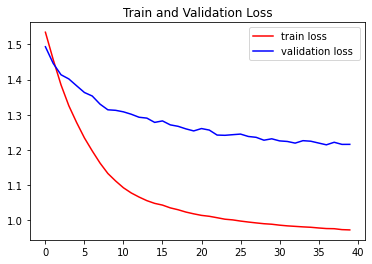

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_loss_trend,label='train loss',color="red")
plt.plot(valid_loss_trend,label='validation loss ',color="blue")
plt.title("Train and Validation Loss")
plt.legend()
plt.show()

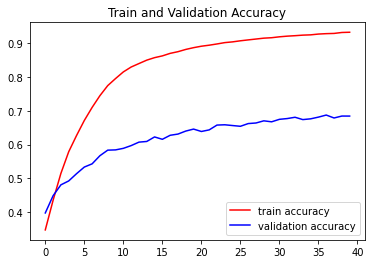

In [ ]:
plt.plot(train_acc_trend,label='train accuracy',color="red")
plt.plot(valid_acc_trend,label='validation accuracy',color="blue")
plt.title("Train and Validation Accuracy")
plt.legend()
plt.show()


###Model Testing###

**Let's Test the Model**

The model will be evaluated with the test data that was not used for training.


In [ ]:
%%time
example_test=[data.Example.fromlist([data_dict['test'].text[i],data_dict['test'].label[i]],fields) for i in range (data_dict['test'].shape[0])]
test = data.Dataset(example_test, fields)
test_iterator=data.BucketIterator(test,batch_size=32,
                                  sort_key = lambda x: len(x.text),
                                  sort_within_batch=True,device=device)

CPU times: user 12min 22s, sys: 7.36 s, total: 12min 30s
Wall time: 12min 28s


In [ ]:
model.load_state_dict(torch.load(model_path))
test_loss, test_acc = evaluate(model, test_iterator, criterion)
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 1.222 | Test Acc: 67.97%


###Predict Sentiment###
The sentiment is predicted on unseen data, which was never part of the dev, train, test sets. Let's see how the model fares.

In [ ]:
model.load_state_dict(torch.load(model_path))
model.eval()
tokenizer_file = open(tokenizer_path, 'rb')
tokenizer = pickle.load(tokenizer_file)

#inference 

import spacy
# load trf instead of base 'en' for greater accuracy
nlp = spacy.load('en') 


def predict_sentiment(text):
    #very negative to very positive (- -, -, 0, +, ++)
    #Labels :  defaultdict(None, {3: 0, 1: 1, 2: 2, 4: 3, 0: 4})
    
    categories = {3: "very negative", 1:"negative", 2:"Neutral",4:"positive",0:"very positive"}
    
    # tokenize the text 
    tokenized = [tok.text for tok in nlp.tokenizer(text)] 
    # convert to integer sequence using predefined tokenizer dictionary
    indexed = [tokenizer[t] for t in tokenized]        
    # compute no. of words        
    length = [len(indexed)]
    # convert to tensor                                    
    tensor = torch.LongTensor(indexed).to(device)   
    # reshape in form of batch, no. of words           
    tensor = tensor.unsqueeze(1).T  
    # convert to tensor                          
    length_tensor = torch.LongTensor(length)
    # Get the model prediction                  
    prediction = model(tensor, length_tensor)

    _, pred = torch.max(prediction, 1) 
    
    return categories[pred.item()]

In [ ]:
# review of mission impossible 5
predict_sentiment("Make no mistake, this predictable movie is clearly part of the Mission: Impossible franchise -- by which we mean it checks off all the usual boxes.")

'negative'

In [ ]:
# review of minari
predict_sentiment("Minari is deeply rooted in the earth, a wellspring of both hope and pain, of boundless promise and terrifying disaster.")

'very negative'

In [ ]:
# review of godzilla vs kong
predict_sentiment("In a patchwork production full of bad ideas poorly executed, Jia also embodies the story’s only good idea.")

'very negative'

In [ ]:
# review of lunch box
predict_sentiment("Irrfan leads the way, underplayed, yet lasting, like a cardamom between your lips.")

'negative'

In [ ]:
# review of avengers endgame
predict_sentiment("The Russo brothers' poignant, powerful finale more than lives up to the hype: It's a thrilling conclusion and a deeply emotional exploration of loss and love, duty and honor, friendship and family.")

'very negative'

In [ ]:
# review of godfather
predict_sentiment("With performances, style and substance to savour, this shows how it is possible to smash box office records without being mindless.")

'very positive'

In [ ]:
# review of saving private ryan
predict_sentiment("Uncompromising, powerful war movie that does not pull any punches. Pefectly balances the inhumanity of war and the humanity of its protagonists. Devastating and essential viewing.")

'very negative'